In [1]:
# Just a basic configuration
import pandas as pd
raw='/Users/xavier/Documents/src/dataviz/inc5000/csv_data/2013_inc5k.csv'
df = pd.read_csv(raw)
df

,Unnamed: 0,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company
0,0,El Segundo,California,Los Angeles,117872000,fuhu,Consumer Products & Services,143,1,22890,1,42148.0287,2,4,CA,Fuhu
1,1,Dumfries,Virginia,"Washington, DC",49625829,federalconferencecom,Government Services,51,2,20989,2,24830.5869,3,7,VA,FederalConference.com
2,2,Jacksonville,Florida,"Jacksonville, FL",25501186,the-hci-group,Health,113,3,22892,1,24544.7799,64,10,FL,The HCI Group
3,3,Carrollton,Texas,Dallas,1919062000,bridger,Energy,50,4,22893,1,23308.1822,8,16,TX,Bridger
4,4,Boston,Massachusetts,Boston,87036000,dataxu,Advertising & Marketing,220,5,22894,1,21337.4384,6,5,MA,DataXu
5,5,Austin,Texas,Austin,45683484,milestone-community-builders,Real Estate,63,6,22895,1,17937.7485,18,3,TX,Milestone Community Builders
6,6,Nashville,Tennessee,CBSA Metro Region,25489171,value-payment-systems,Financial Services,27,7,22896,1,17404.1348,977,2,TN,Value Payment Systems
7,7,San Francisco,California,San Francisco,23858231,emerge-digital-group,Advertising & Marketing,75,8,22897,1,17064.0715,4,5,CA,Emerge Digital Group
8,8,Bluffdale,Utah,Salt Lake City,33104308,goal-zero,Consumer Products & Services,97,9,22898,1,16980.5405,12,4,UT,Goal Zero
9,9,Warwick,Rhode Island,"Providence-New Bedford-Fall River, RI-MA",18636055,yagoozon,Retail,15,10,21148,2,16689.2387,55,18,RI,Yagoozon


# CURATING BY GEOGRAPHY
<hr>
So let's start looking at the companies that are in NYC and roughly related to our industry:

In [5]:
## Advertising and marketing in NYC
nyagencies = df[(df['city'] == "New York") & (df['industry'] == "Advertising & Marketing")]
nyagencies.shape

(45, 16)

In [6]:
## Media
nymedia = df[(df['city'] == "New York") & (df['industry'] == "Media")]
nymedia.shape

(11, 16)

In [8]:
## Business Services
nyb2b = df[(df['city'] == "New York") & (df['industry'] == "Business Products & Services")]
nyb2b.shape

(18, 16)

In [11]:
## Software
nysw = df[(df['city'] == "New York") & (df['industry'] == "Software")]
nysw.shape

(7, 16)

In [12]:
nysw

,Unnamed: 0,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company
1364,1364,New York,New York,New York City,12911861,impelsys,Software,220,1371,23605,1,294.1297,9,9,NY,Impelsys
1549,1549,New York,New York,New York City,2059939,modiface,Software,25,1559,23667,1,254.8364,9,9,NY,ModiFace
2204,2204,New York,New York,New York City,4455439,globo-mobile,Software,320,2218,23905,1,166.6974,9,9,NY,Globo Mobile
2945,2945,New York,New York,New York City,30658641,dataart,Software,800,2964,18103,4,114.1616,9,9,NY,DataArt
4132,4132,New York,New York,New York City,2025267,edulence,Software,15,4158,24418,1,62.3005,9,9,NY,Edulence
4310,4310,New York,New York,New York City,5884952,cyrus-innovation,Software,46,4336,230,5,55.7484,9,9,NY,Cyrus Innovation
4569,4569,New York,New York,New York City,56411212,numerix,Software,198,4595,22137,2,47.5251,9,9,NY,Numerix


3 out of 4 of the 2016 Inc 5000 companies have revenue between **1M** and **30M** dollars.

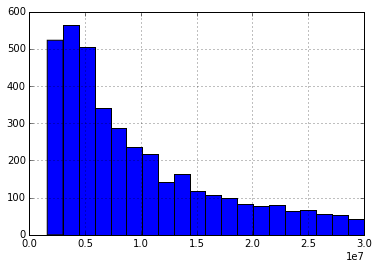

In [31]:
allrev16_plot = radar['revenue'].hist(bins=20)

No clear 'sweet spot' when arranged purely by revenue. 

Next let's filter capabilities, excluding companies that aren't a strategic fit.

In [37]:
revbytype = radar[['revenue','industry']]
breakdown = revbytype.groupby('industry')

In [39]:
breakdown.size()

industry
Advertising & Marketing         413
Business Products & Services    383
Computer Hardware                20
Construction                    190
Consumer Products & Services    175
Education                        58
Energy                           65
Engineering                      53
Environmental Services           29
Financial Services              169
Food & Beverage                 101
Government Services             186
Health                          269
Human Resources                 125
IT Services                     556
Insurance                        52
Logistics & Transportation       74
Manufacturing                   122
Media                            56
Real Estate                     146
Retail                          129
Security                         53
Software                        287
Telecommunications               71
Travel & Hospitality             47
dtype: int64

Advertising & Marketing firms top the list of available companies in the **3,829** companies we can afford

Let's take a look at the top 10 types of companies.

In [44]:
toptypes = breakdown.size()
toptypes

industry
Advertising & Marketing         413
Business Products & Services    383
Computer Hardware                20
Construction                    190
Consumer Products & Services    175
Education                        58
Energy                           65
Engineering                      53
Environmental Services           29
Financial Services              169
Food & Beverage                 101
Government Services             186
Health                          269
Human Resources                 125
IT Services                     556
Insurance                        52
Logistics & Transportation       74
Manufacturing                   122
Media                            56
Real Estate                     146
Retail                          129
Security                         53
Software                        287
Telecommunications               71
Travel & Hospitality             47
dtype: int64




Let's compare this with the last 9 years of companies in the have revenue between **1M** and **30M** dollars.

In [35]:
breakdown.sum().sort(columns='revenue')

,revenue
industry,
Media,795106126
Environmental Services,874563791
Computer Hardware,1282683661
Education,1397354203
Travel & Hospitality,1828206652
Engineering,2046707548
Energy,2956262167
Telecommunications,5236184377
Security,5399867881
